In [1]:
##loading the dependencies
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.


#**Introduction TO Problem Domain**

**In this section we are using the common stack of libraries for computer vision**

1.   Pandas 
2.   Numpy
3.   martplotlib.pyplot
4.   Keras
5.   tensorflow

*in this section we are going to load the data in google colab notebook using kaggle API as our data is provided at kaggle.
we will do some kind of EDA 
well this is not much required for the case og computer vision*

**We are going to deal with image recognition task.**

**Problem Statement:----**

**We have been given to classify the Hand Written Alphabets.**



In [2]:
##Loading the dataset
df = pd.read_csv('A_Z Handwritten Data.csv')
df.head(8)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


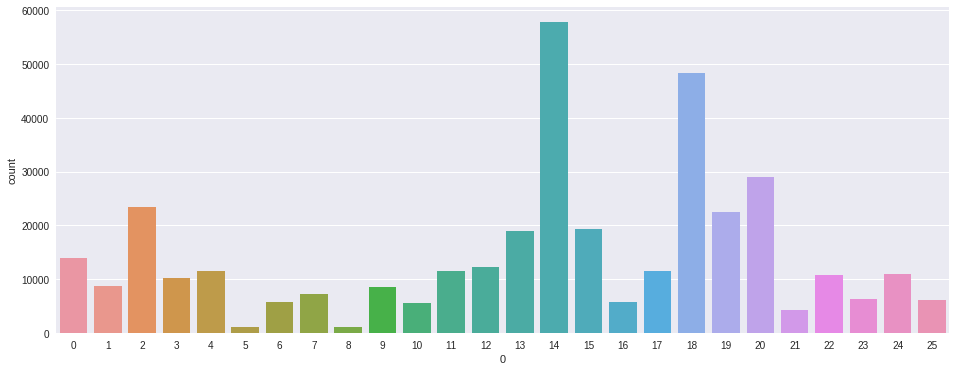

In [14]:
# Basic analysis

# count plot
plt.figure(figsize = (16,6))
import seaborn as sns
x = df['0'].sort_values(axis = 0)
sns.countplot(x)

'''
this is highly imbalanced dataset
we'll see how to deal with this in the data agumentation section.
'''

In [7]:
##Lets filter out the classes having undersampled dataset
x_count = pd.DataFrame(df['0'].value_counts()).astype(int)
alpha_list = [i for i in range(26) if x_count['0'][i] < 14000]
print(alpha_list,'is the list containing alphabets having low no of counts')
print(len(alpha_list),'is the total number of columns')

[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17, 21, 22, 23, 24, 25] is the list containing alphabets having low no of counts
19 is the total number of columns


In [17]:
## lets check the distribution of the dataset
df.describe()

'''
Thus we see that there are some columns with mean 0 and they are useless in some sense so it requires use of PCA to project in lower subspace.
It is assumed that the max pixel value is 255.
'''

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


# Image Formation out of csv files

In [3]:
## its time to convert the dataframe in to images of size 28X28X1 as it is gray scaled
##just using a subset for demonstration
X = df.iloc[:1000,1:].values
y = df.iloc[:1000,[0]].values

In [4]:
## resizing 
X = X.astype('float32')
X = X/255.0

X = X.reshape(-1,28,28,1)
print(X.shape)

(1000, 28, 28, 1)


In [0]:
#deleting df,X,y
del df


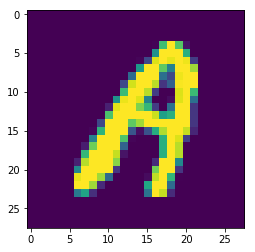

[0]


'\nThus we found that the labels are consistance enough\n'

In [6]:
##lets plotlone of the image
plt.imshow(X[0][:,:,0])
plt.show()

##checking if the image is consistance with the label
print(y[0])

'''
Thus we found that the labels are consistance enough
'''

In [7]:
## as we have less data for some of the alphabets so lets create own dataset and lebels for that section using something called
## data agumentation

##required library is 
from keras.preprocessing.image import ImageDataGenerator

# Data Agumentation
**Image agumentation is the process of taking images that are already in training data and manipulating them to create many altered versions of the same image.**
**Advantages---->**
**Provides more images to training and also exposes our classifier to wider variety of lighting and coloring situations and to make our classifier more robust.**

In [10]:
def image_agumentation(X,y):
  
  '''
  alpha_index is taken from alpha_list which contains the list of all those alphabets which are less in number.
  '''
  
  ##getting the data for that alpha_index
  
  ##calling the functions for our task
  image_standardization(X,y)
  zca_whitening(X,y)
  random_rotations(X,y)
  random_shifts(X,y)
  zoom_range(X,y)
  
  return True


image_agumentation(X,y)

KeyboardInterrupt: 

# Background
**ZCA whitening**

**linear algebra operation that reduces the redundency in the matrix of pixel images,
and less redundency in the image is intended to better highlight the structures and features in the image to the libear algorithm.
Performed using PCA technique.**

In [9]:
import os

#making a directory called images
os.mkdir('images')


## feature standardization
def image_standardization(x_alpha,y_alpha):
  datagen = ImageDataGenerator(featurewise_center = True,featurewise_std_normalization  = True)
  datagen.fit(x_alpha)
  #configuring the batch_size
  batch_size = len(x_alpha)
  for x_gen,y_label in datagen.flow(x_alpha,y_alpha,batch_size = batch_size,save_to_dir = 'images',save_prefix = 'std',save_format = 'png'):
    continue
    
  return True

## feature whitening
def zca_whitening(x_alpha,y_alpha):
  datagen = ImageDataGenerator(zca_whitening = True)
  datagen.fit(x_alpha)
  #configuring the batch_size
  batch_size = len(x_alpha)
  for x_gen,y_label in datagen.flow(x_alpha,y_alpha,batch_size = batch_size,save_to_dir = 'images',save_prefix = 'zca',save_format = 'png'):
    continue
  return True


##random rotations
def random_rotations(x_alpha,y_alpha):
  datagen = ImageDataGenerator(rotation_range = 50)
  datagen.fit(x_alpha)
  #configuring the batch_size
  batch_size = len(x_alpha)
  for x_gen,y_label in datagen.flow(x_alpha,y_alpha,batch_size = batch_size,save_to_dir = 'images',save_prefix = 'rand_rot',save_format = 'png'):
    continue
  return True

def random_shifts(x_alpha,y_alpha):
  datagen = ImageDataGenerator(width_shift_range = 0.2,height_shift_range = 0.2)
  datagen.fit(x_alpha)
  #configuring the batch_size
  batch_size = len(x_alpha)
  for x_gen,y_label in datagen.flow(x_alpha,y_alpha,batch_size = batch_size,save_to_dir = 'images',save_prefix = 'rand-shift',save_format = 'png'):
    continue
  return True

def zoom_range(x_alpha,y_alpha):
  datagen = ImageDataGenerator(zoom_range = 0.2)
  datagen.fit(x_alpha)
  #configuring the batch_size
  batch_size = len(x_alpha)
  for x_gen,y_label in datagen.flow(x_alpha,y_alpha,batch_size = batch_size,save_to_dir = 'images',save_prefix = 'zoom',save_format = 'png'):
    continue
  return True

  